# Human Activity Recognition with Smartphones
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

## Description
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

 ## Attribute information
For each record in the dataset the following is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

-  Triaxial Angular velocity from the gyroscope.

- A 561-feature vector with time and frequency domain variables.

- Its activity label.

- An identifier of the subject who carried out the experiment.

## Importing The Required Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
import warnings
warnings.filterwarnings('ignore') # remove warnings from the notebook
%matplotlib inline

##Loading Data

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/ML Projects/Human Activity Recognition Using Smartphones

/content/drive/My Drive/ML Projects/Human Activity Recognition Using Smartphones


In [0]:
train_df= pd.read_csv("train.csv") # Training Data

In [0]:
validation_df= pd.read_csv("test.csv") #  Testing Data

##Data Exploration

In [6]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,...,-0.436471,-0.796840,-0.993726,-0.993755,-0.991976,-0.993365,-0.988175,-0.993726,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,...,-0.122040,-0.449522,-0.990335,-0.991960,-0.989732,-0.994489,-0.989549,-0.990335,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.

In [7]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [8]:
# Checking for Duplicates
print('No of duplicates in train: {}'.format(sum(train_df.duplicated())))
print('No of duplicates in test : {}'.format(sum(validation_df.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [9]:
# Checking For Missing Values
print('There are {} NaN/Null values in train'.format(train_df.isnull().values.sum()))
print('There are {} NaN/Null values in test'.format(validation_df.isnull().values.sum()))

There are 0 NaN/Null values in train
There are 0 NaN/Null values in test


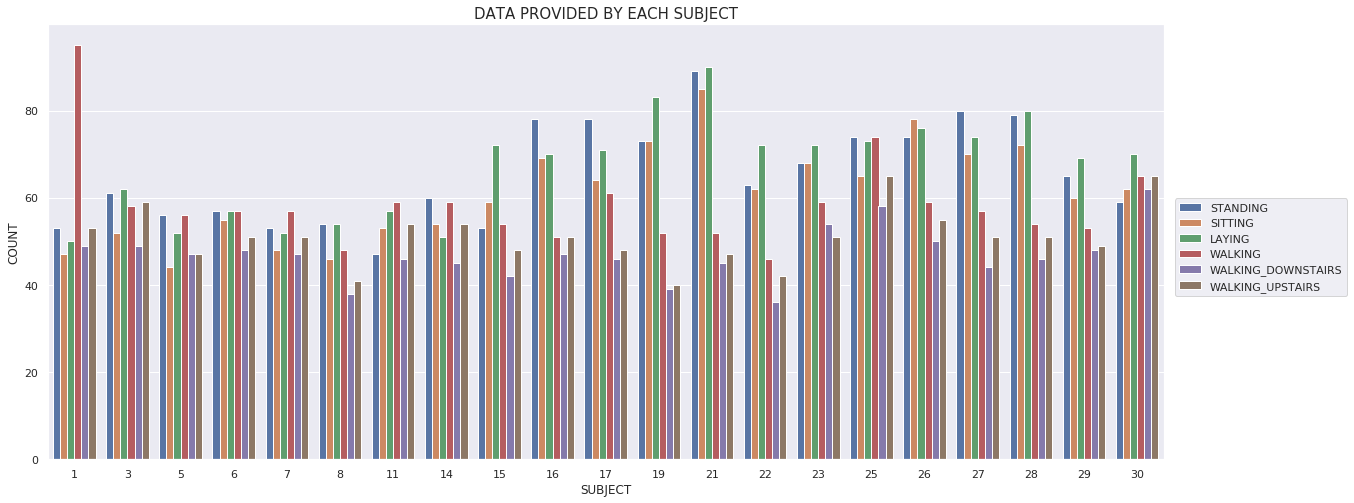

In [10]:
# Data Provided by each Subject
sns.set()
plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.title('DATA PROVIDED BY EACH SUBJECT', fontsize=15)
ax= sns.countplot(x='subject',hue='Activity', data = train_df)
ax.set(xlabel='SUBJECT', ylabel='COUNT')
plt.legend(bbox_to_anchor=(1.01, 0.60), loc=2, borderaxespad=0.)
plt.show();

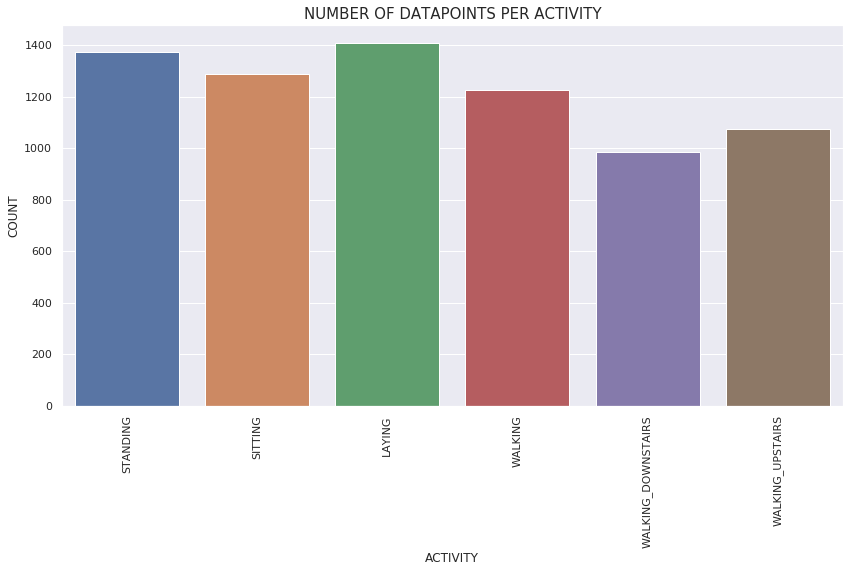

In [11]:
#Check for Data Imbalance
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(14,7))
plt.title('NUMBER OF DATAPOINTS PER ACTIVITY', fontsize=15)
ax= sns.countplot(train_df.Activity)
ax.set(xlabel='ACTIVITY', ylabel='COUNT')
plt.xticks(rotation=90)
plt.show()

In [0]:
columns = train_df.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_df.columns = columns
validation_df.columns = columns

- **Static and Dynamic Activities**
 - **In static activities (sit, stand, lie down) motion information will not be very useful.**
 - **In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.**

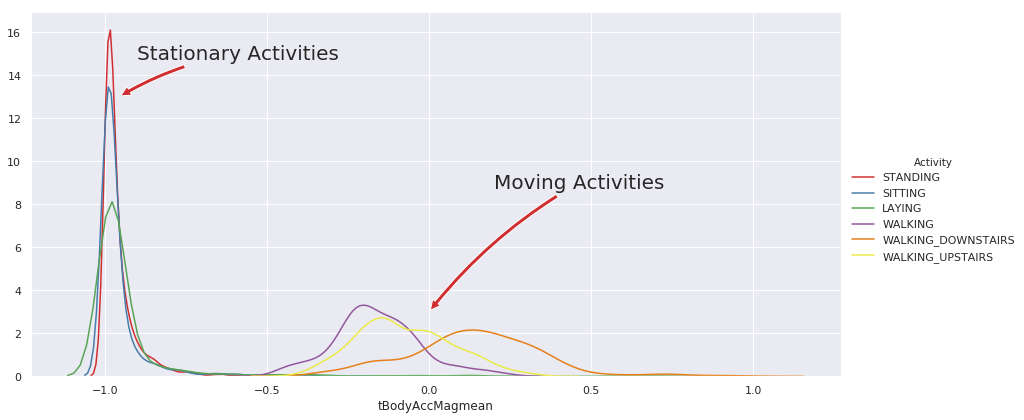

In [13]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_df, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,13), xytext=(-0.9, 15), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"));
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"));
plt.show();

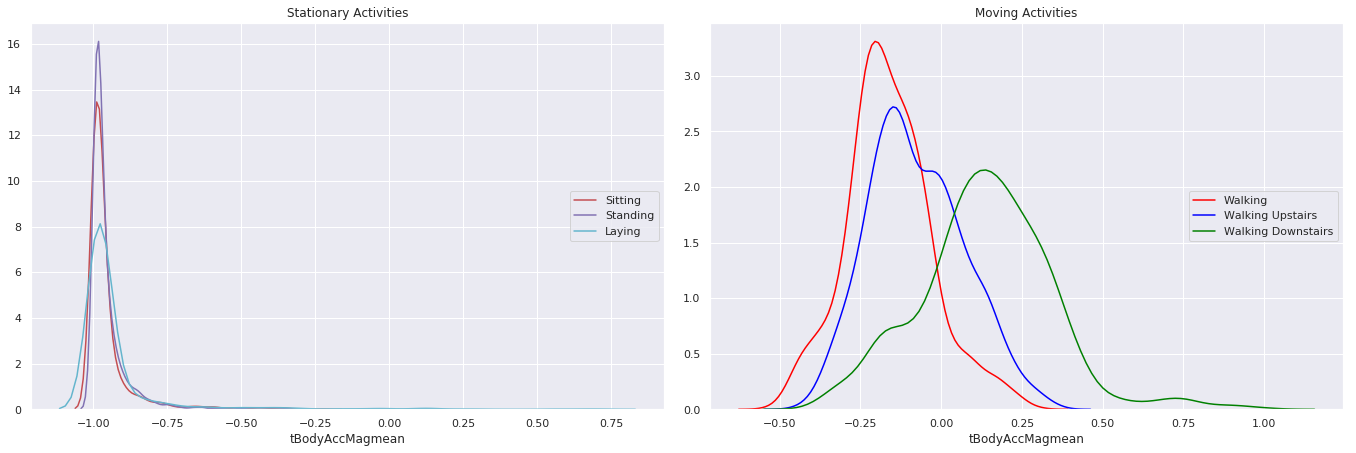

In [14]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train_df[train_df['Activity']== 'WALKING']
df2 = train_df[train_df['Activity']== 'WALKING_UPSTAIRS']
df3 = train_df[train_df['Activity']== 'WALKING_DOWNSTAIRS']
df4 = train_df[train_df['Activity']== 'SITTING']
df5 = train_df[train_df['Activity']== 'STANDING']
df6 = train_df[train_df['Activity']== 'LAYING']

plt.figure(figsize=(19,12))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.legend(loc='center right')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'], color = 'red', hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'], color = 'blue', hist = False,label = 'Walking Upstairs')
sns.distplot(df3['tBodyAccMagmean'], color = 'green', hist = False, label = 'Walking Downstairs')
plt.legend(loc='center right')

plt.tight_layout()
plt.show();

In [0]:
# summarize the balance of classes in an output variable column
def class_breakdown(df):
	# group data by the class value and calculate the number of rows
	count = df.groupby(df['Activity'])
	# retrieve raw rows
	counts = count.size().values
	# summarize
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, %s, total=%d, percentage=%.3f ' % (i+1,list(count.groups.keys())[i], counts[i], percent))

In [16]:
# load train file
print('TRAIN DATASET')
class_breakdown(train_df)
# load test file
print('\n\nTEST DATASET')
class_breakdown(validation_df)
# summarize combined class breakdown
print('\n\nBOTH')
class_breakdown(pd.concat([train_df, validation_df]))

TRAIN DATASET
Class=1, LAYING, total=1407, percentage=19.138 
Class=2, SITTING, total=1286, percentage=17.492 
Class=3, STANDING, total=1374, percentage=18.689 
Class=4, WALKING, total=1226, percentage=16.676 
Class=5, WALKING_DOWNSTAIRS, total=986, percentage=13.411 
Class=6, WALKING_UPSTAIRS, total=1073, percentage=14.595 


TEST DATASET
Class=1, LAYING, total=537, percentage=18.222 
Class=2, SITTING, total=491, percentage=16.661 
Class=3, STANDING, total=532, percentage=18.052 
Class=4, WALKING, total=496, percentage=16.831 
Class=5, WALKING_DOWNSTAIRS, total=420, percentage=14.252 
Class=6, WALKING_UPSTAIRS, total=471, percentage=15.982 


BOTH
Class=1, LAYING, total=1944, percentage=18.876 
Class=2, SITTING, total=1777, percentage=17.254 
Class=3, STANDING, total=1906, percentage=18.507 
Class=4, WALKING, total=1722, percentage=16.720 
Class=5, WALKING_DOWNSTAIRS, total=1406, percentage=13.652 
Class=6, WALKING_UPSTAIRS, total=1544, percentage=14.992 


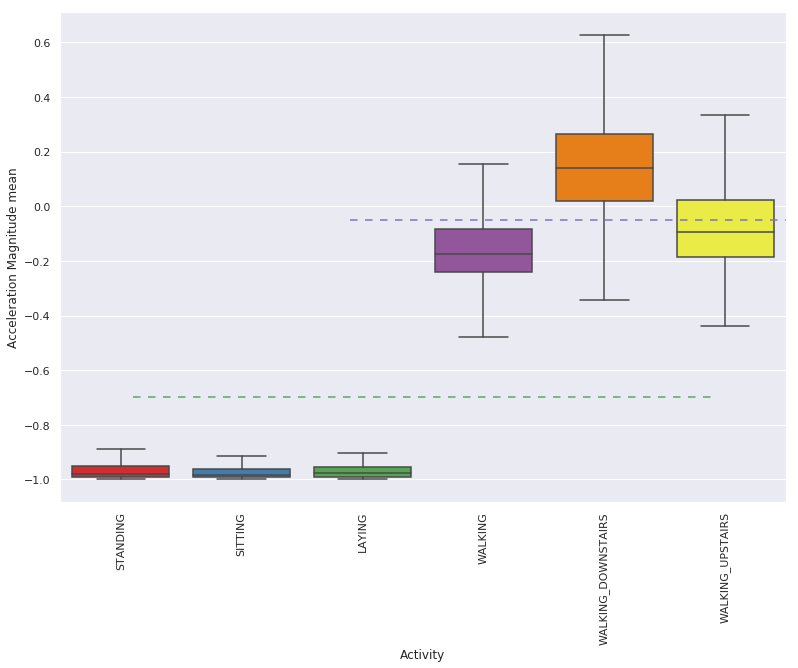

In [17]:
# Magnitude of an acceleration can saperate it well
plt.figure(figsize=(13,9))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train_df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

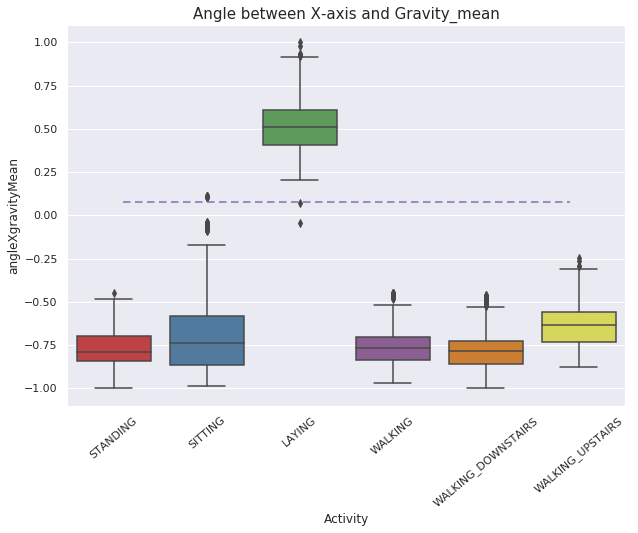

In [18]:
# Position of GravityAccelerationComponants also matters
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angleXgravityMean', data=train_df)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

**Observations:**

- If angleX,gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

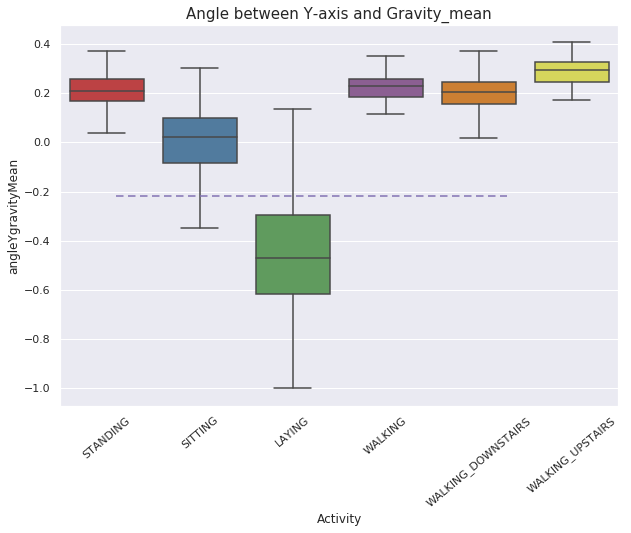

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angleYgravityMean', data = train_df, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [0]:
# performs t-sne with different perplexity values and their repective plots..
from sklearn.manifold import TSNE
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..


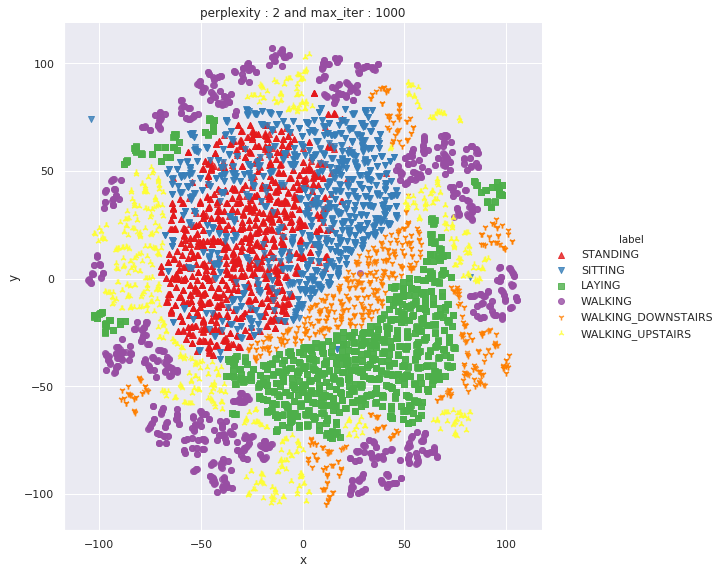

Done

performing tsne with perplexity 5 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..


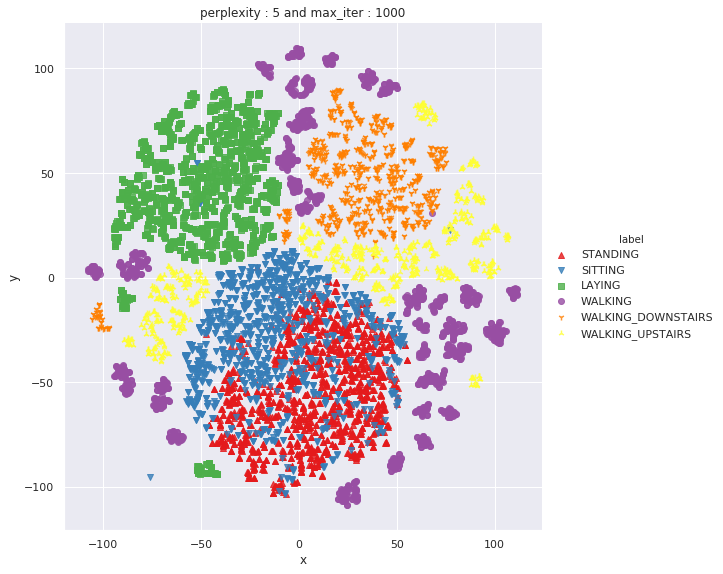

Done

performing tsne with perplexity 10 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..


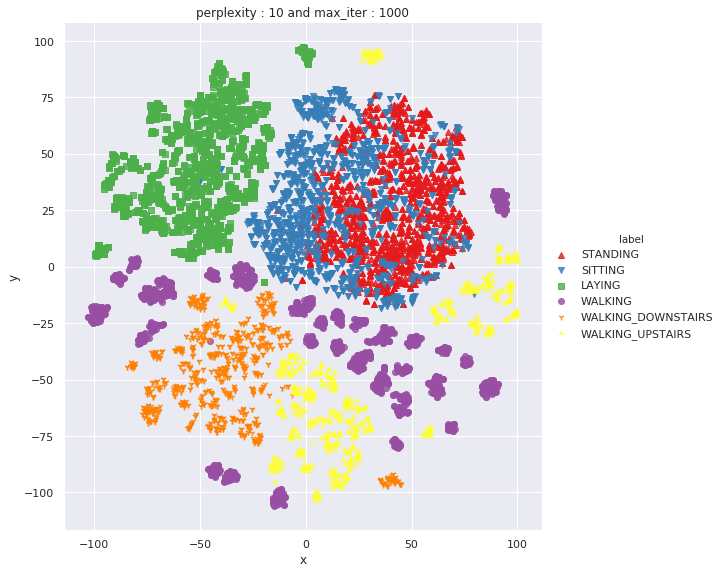

Done

performing tsne with perplexity 20 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..


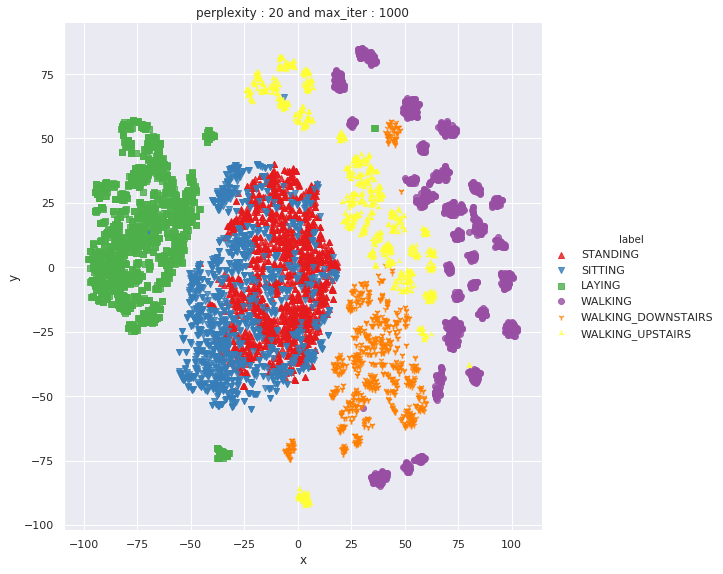

Done

performing tsne with perplexity 50 and with 1000 iterations at max
Done..
Creating plot for this t-sne visualization..


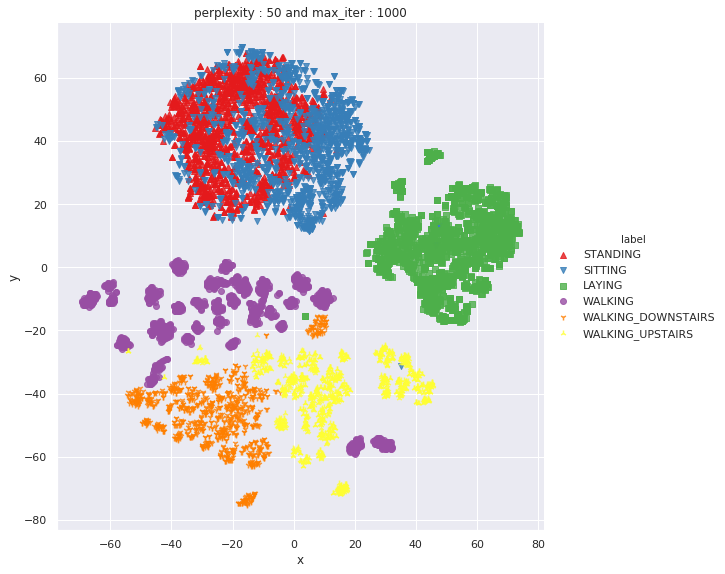

Done


In [21]:
X_pre_tsne = train_df.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train_df['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [0]:
sub1= train_df.loc[train_df['subject']==1]

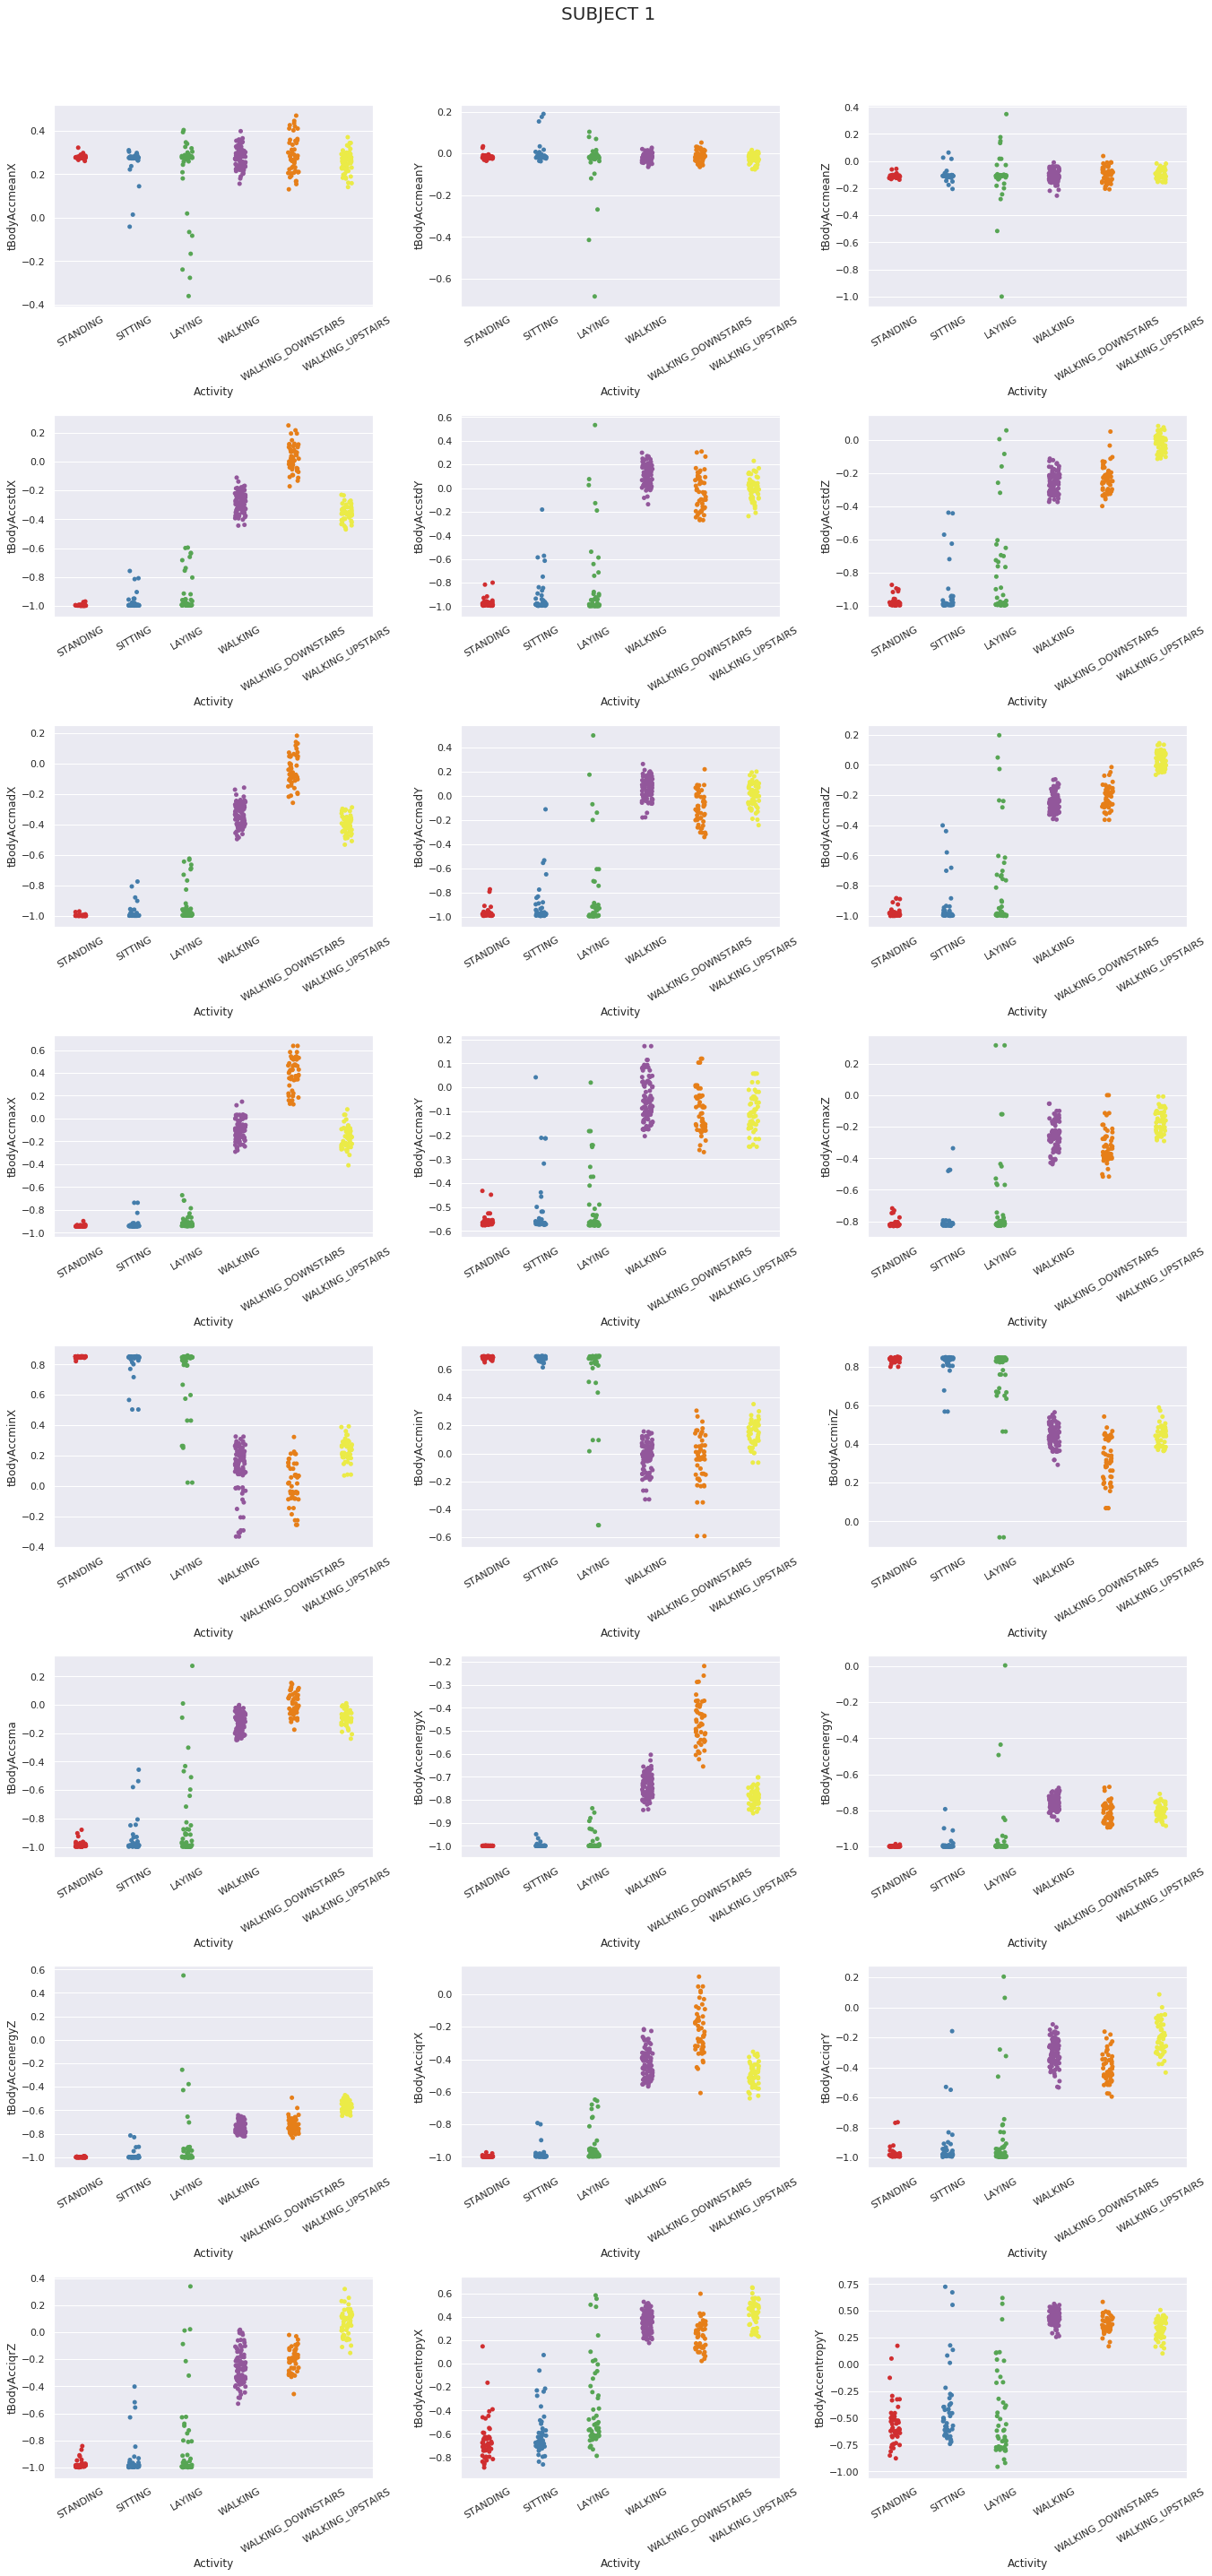

In [23]:
fig = plt.figure(figsize=(19,42))
plt.suptitle('SUBJECT 1', fontsize=20)
for i in range(1,25):
  plt.subplot(8, 3, i)
  sns.stripplot(x='Activity', y=sub1.iloc[:,i-1], data=sub1, jitter=True)
  plt.xticks(rotation=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [0]:
sub3= train_df.loc[train_df['subject']==3]

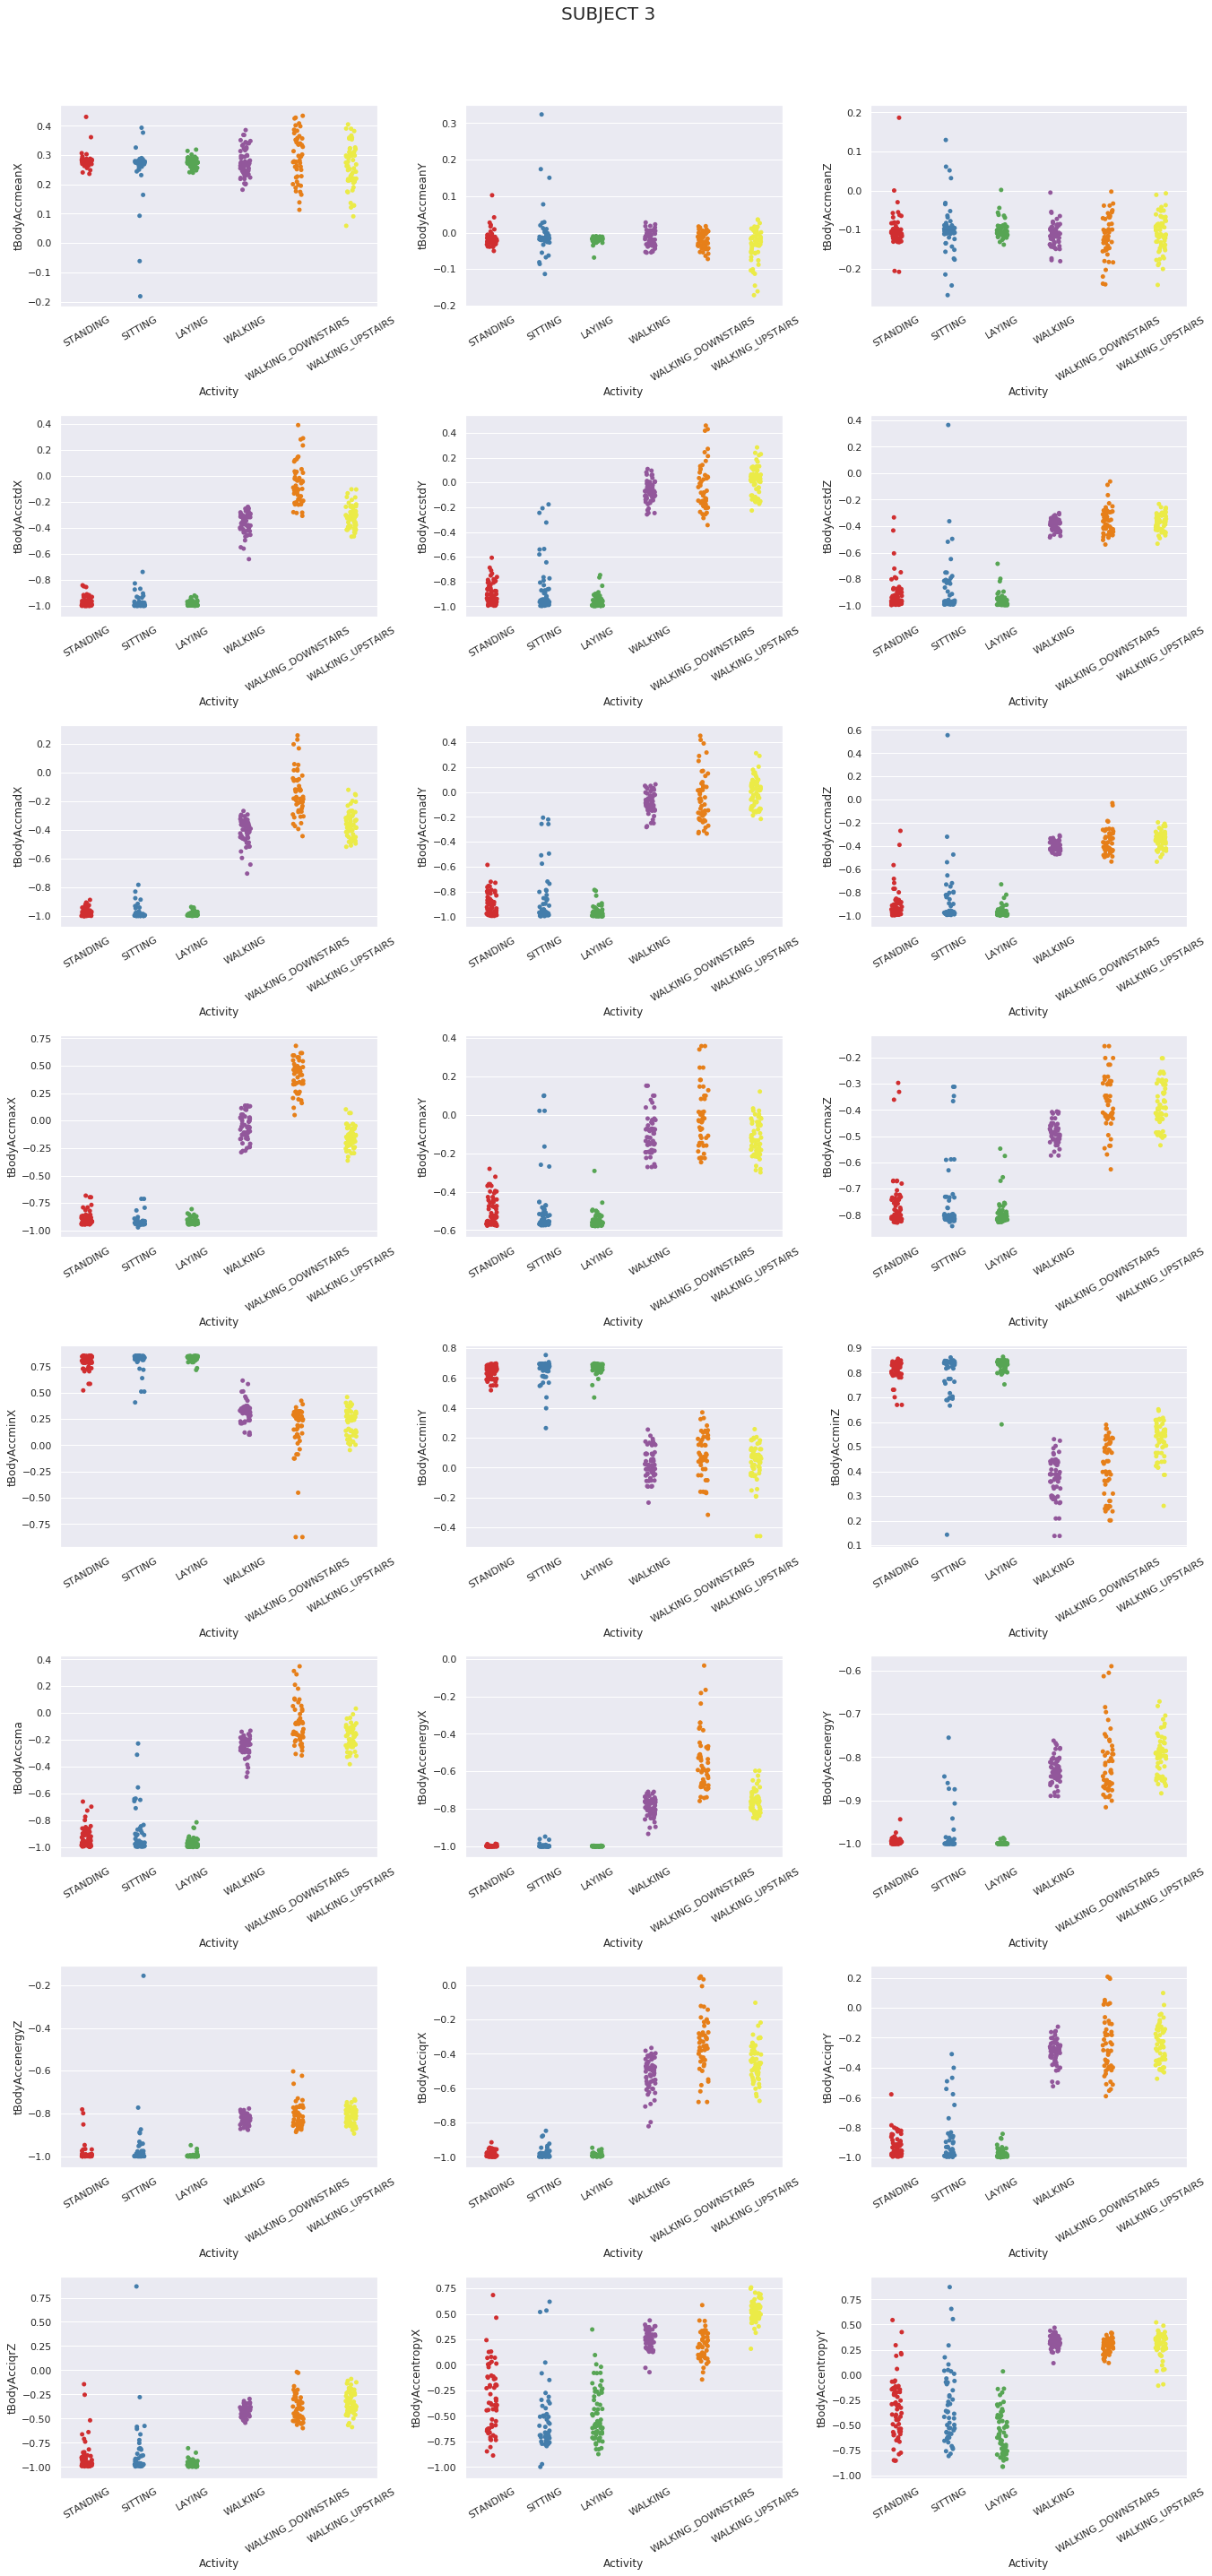

In [25]:
fig = plt.figure(figsize=(19,42))
plt.suptitle('SUBJECT 3', fontsize=20)
for i in range(1,25):
  plt.subplot(8, 3, i)
  sns.stripplot(x='Activity', y=sub3.iloc[:,i-1], data=sub3, jitter=True)
  plt.xticks(rotation=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [26]:
pd.crosstab(train_df.subject, train_df.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


##Data Preprocessing

In [27]:
# encoding response variable
unique_activities = train_df.Activity.unique()
print("NUmber of unique activities: {}".format(len(unique_activities)))
replacer = {}
for i, activity in enumerate(unique_activities):
    replacer[activity] = i
train_df.Activity = train_df.Activity.replace(replacer)
validation_df.Activity = validation_df.Activity.replace(replacer)
train_df.head(10)

NUmber of unique activities: 6


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,tGravityAccmeanX,tGravityAccmeanY,tGravityAccmeanZ,tGravityAccstdX,tGravityAccstdY,tGravityAccstdZ,tGravityAccmadX,tGravityAccmadY,tGravityAccmadZ,tGravityAccmaxX,...,fBodyAccMagskewness,fBodyAccMagkurtosis,fBodyBodyAccJerkMagmean,fBodyBodyAccJerkMagstd,fBodyBodyAccJerkMagmad,fBodyBodyAccJerkMagmax,fBodyBodyAccJerkMagmin,fBodyBodyAccJerkMagsma,fBodyBodyAccJerkMagenergy,fBodyBodyAccJerkMagiqr,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,...,-0.436471,-0.796840,-0.993726,-0.993755,-0.991976,-0.993365,-0.988175,-0.993726,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,...,-0.122040,-0.449522,-0.990335,-0.991960,-0.989732,-0.994489,-0.989549,-0.990335,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977

In [0]:
from sklearn.utils import shuffle

validation_df  = shuffle(validation_df)
train_df = shuffle(train_df)

In [0]:
X=  train_df.drop(['subject', 'Activity'], axis=1)
y= train_df['Activity']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5, stratify= train_df.Activity)

In [0]:
# Scalling the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

##Model Building

In [0]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.9891


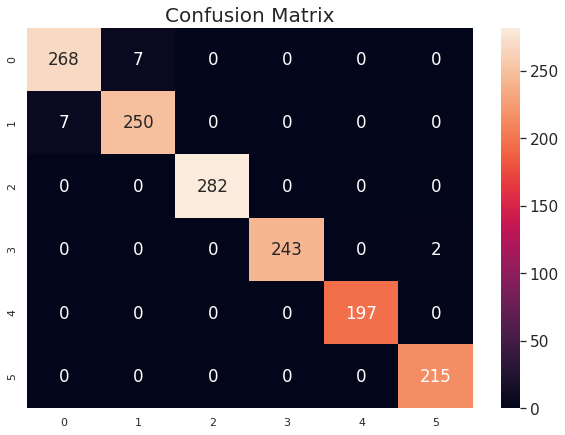

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix", fontsize= 20)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [34]:
acc = accuracy_score(y_train, classifier.predict(X_train))
prec = precision_score(y_train, classifier.predict(X_train), average='micro')
rec = recall_score(y_train, classifier.predict(X_train), average='micro')
f1 = f1_score(y_train, classifier.predict(X_train), average='micro')
results = pd.DataFrame([['Logistic Regression (Lasso) - Training', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
model_results = pd.DataFrame([['Logistic Regression (Lasso) - Testing', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) - Training,0.994729,0.994729,0.994729,0.994729
1,Logistic Regression (Lasso) - Testing,0.989123,0.989123,0.989123,0.989123


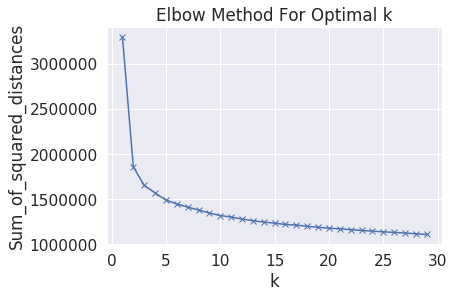

In [39]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Test Data Accuracy: 0.9558


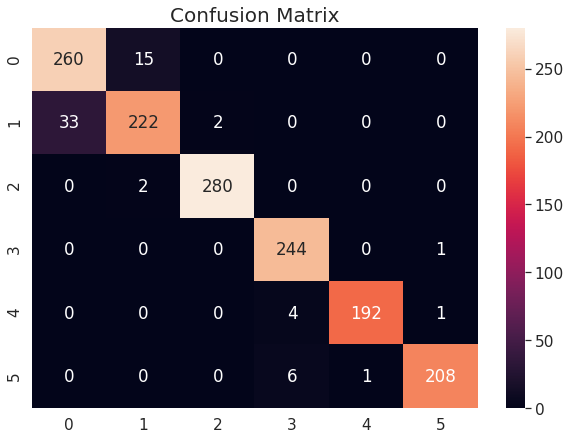

In [41]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix", fontsize= 20)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [42]:
acc = accuracy_score(y_train, classifier.predict(X_train))
prec = precision_score(y_train, classifier.predict(X_train), average='micro')
rec = recall_score(y_train, classifier.predict(X_train), average='micro')
f1 = f1_score(y_train, classifier.predict(X_train), average='micro')
model_results = pd.DataFrame([['KNN Classifier - Training', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
model_results = pd.DataFrame([['KNN Classifier - Testing', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) - Training,0.994729,0.994729,0.994729,0.994729
1,Logistic Regression (Lasso) - Testing,0.989123,0.989123,0.989123,0.989123
2,KNN Classifier - Training,0.978575,0.978575,0.978575,0.978575
3,KNN Classifier - Testing,0.955812,0.955812,0.955812,0.955812


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy') # we only care about accuracy here
selector.fit(X_train, y_train)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print("\n")

Best parameter set found:
{'C': 20, 'kernel': 'rbf'}
Detailed grid scores:
0.978 (+/-0.004) for {'C': 100, 'kernel': 'linear'}


0.982 (+/-0.001) for {'C': 100, 'kernel': 'rbf'}


0.981 (+/-0.003) for {'C': 100, 'kernel': 'poly'}


0.844 (+/-0.027) for {'C': 100, 'kernel': 'sigmoid'}


0.978 (+/-0.004) for {'C': 50, 'kernel': 'linear'}


0.982 (+/-0.002) for {'C': 50, 'kernel': 'rbf'}


0.980 (+/-0.005) for {'C': 50, 'kernel': 'poly'}


0.847 (+/-0.028) for {'C': 50, 'kernel': 'sigmoid'}


0.978 (+/-0.004) for {'C': 20, 'kernel': 'linear'}


0.983 (+/-0.005) for {'C': 20, 'kernel': 'rbf'}


0.980 (+/-0.010) for {'C': 20, 'kernel': 'poly'}


0.853 (+/-0.026) for {'C': 20, 'kernel': 'sigmoid'}


0.981 (+/-0.003) for {'C': 1, 'kernel': 'linear'}


0.973 (+/-0.007) for {'C': 1, 'kernel': 'rbf'}


0.960 (+/-0.007) for {'C': 1, 'kernel': 'poly'}


0.902 (+/-0.036) for {'C': 1, 'kernel': 'sigmoid'}


0.982 (+/-0.005) for {'C': 0.1, 'kernel': 'linear'}


0.916 (+/-0.016) for {'C': 0.1, 'kernel

In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C= 20, random_state=20)
classifier.fit(X_train, y_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=20,
    shrinking=True, tol=0.001, verbose=False)

Test Data Accuracy: 0.9912


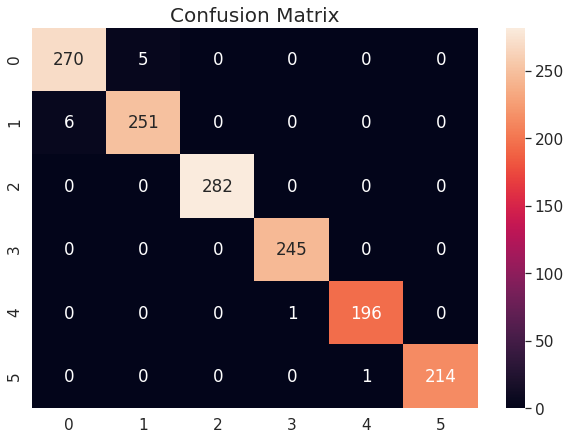

In [47]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix", fontsize= 20)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [48]:
acc = accuracy_score(y_train, classifier.predict(X_train))
prec = precision_score(y_train, classifier.predict(X_train), average='micro')
rec = recall_score(y_train, classifier.predict(X_train), average='micro')
f1 = f1_score(y_train, classifier.predict(X_train), average='micro')
model_results = pd.DataFrame([['SVM Classifier - Training', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
model_results = pd.DataFrame([['SVM Classifier - Testing', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) - Training,0.994729,0.994729,0.994729,0.994729
1,Logistic Regression (Lasso) - Testing,0.989123,0.989123,0.989123,0.989123
2,KNN Classifier - Training,0.978575,0.978575,0.978575,0.978575
3,KNN Classifier - Testing,0.955812,0.955812,0.955812,0.955812
4,SVM Classifier - Training,0.999320,0.999320,0.999320,0.999320
5,SVM Classifier - Testing,0.991162,0.991162,0.991162,0.991162


In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Test Data Accuracy: 0.7165


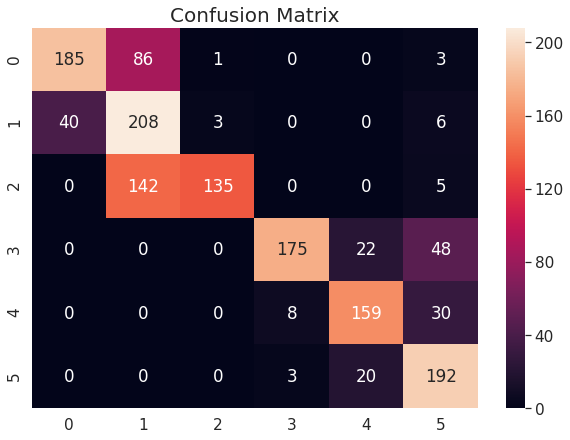

In [50]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix", fontsize= 20)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [51]:
acc = accuracy_score(y_train, classifier.predict(X_train))
prec = precision_score(y_train, classifier.predict(X_train), average='micro')
rec = recall_score(y_train, classifier.predict(X_train), average='micro')
f1 = f1_score(y_train, classifier.predict(X_train), average='micro')
model_results = pd.DataFrame([['GaussianNB Classifier - Training', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
model_results = pd.DataFrame([['GaussianNB Classifier - Testing', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) - Training,0.994729,0.994729,0.994729,0.994729
1,Logistic Regression (Lasso) - Testing,0.989123,0.989123,0.989123,0.989123
2,KNN Classifier - Training,0.978575,0.978575,0.978575,0.978575
3,KNN Classifier - Testing,0.955812,0.955812,0.955812,0.955812
4,SVM Classifier - Training,0.999320,0.999320,0.999320,0.999320
5,SVM Classifier - Testing,0.991162,0.991162,0.991162,0.991162
6,GaussianNB Classifier - Training,0.717905,0.717905,0.717905,0.717905
7,GaussianNB Classifier - Testing,0.716519,0.716519,0.716519,0.716519


##Final Model

In [67]:
from sklearn.svm import SVC
final_model = SVC(kernel = 'rbf', C= 20, random_state=20)
final_model.fit(X_train, y_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=20,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
validation_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,tGravityAccmeanX,tGravityAccmeanY,tGravityAccmeanZ,tGravityAccstdX,tGravityAccstdY,tGravityAccstdZ,tGravityAccmadX,tGravityAccmadY,tGravityAccmadZ,tGravityAccmaxX,...,fBodyAccMagskewness,fBodyAccMagkurtosis,fBodyBodyAccJerkMagmean,fBodyBodyAccJerkMagstd,fBodyBodyAccJerkMagmad,fBodyBodyAccJerkMagmax,fBodyBodyAccJerkMagmin,fBodyBodyAccJerkMagsma,fBodyBodyAccJerkMagenergy,fBodyBodyAccJerkMagiqr,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
2482,0.267110,-0.017316,-0.110265,-0.992718,-0.993434,-0.982284,-0.993405,-0.994040,-0.984081,-0.942694,-0.571564,-0.809693,0.838681,0.693166,0.833514,-0.991969,-0.999921,-0.999967,-0.999608,-0.993523,-0.995089,-0.987867,-0.786553,-0.731902,-0.545706,0.157905,-0.180561,0.223039,-0.092411,0.452656,-0.169652,0.308938,-0.019666,0.066431,0.104550,0.075861,-0.101582,0.025280,-0.062027,-0.179260,-0.503544,0.976466,0.244630,-0.985797,-0.999289,-0.994276,-0.985330,-0.999246,-0.994091,-0.566023,...,-0.530569,-0.757848,-0.986991,-0.987313,-0.983319,-0.989033,-0.989057,-0.986991,-0.999785,-0.984855,-1.000000,-1.000000,0.410504,-0.573464,-0.839515,-0.986578,-0.990624,-0.989980,-0.991579,-0.990946,-0.986578,-0.999880,-0.990874,-0.794290,-0.948718,0.408543,-0.501823,-0.777845,-0.989173,-0.992197,-0.990411,-0.994597,-0.987633,-0.989173,-0.999923,-0.988031,-0.895847,-0.968254,0.532429,-0.672078,-0.913037,0.062298,-0.052936,0.768164,-0.159800,0.612772,-0.841648,-0.151370,20,2
1336,0.298285,-0.028507,-0.140558,-0.251566,-0.279090,-0.466975,-0.302004,-0.339345,-0.464816,0.139300,-0.131653,-0.562956,0.338599,0.171520,0.423439,-0.283018,-0.718560,-0.898457,-0.867512,-0.388094,-0.575208,-0.524029,0.222928,0.088401,0.236116,-0.237691,0.075727,0.149354,-0.014467,-0.178022,0.156917,0.126965,-0.196304,-0.288915,0.333067,-0.307070,0.101188,-0.277384,-0.455334,0.092657,0.937350,-0.222515,-0.131825,-0.901862,-0.883551,-0.916473,-0.906871,-0.883721,-0.916310,0.914558,...,-0.354298,-0.695936,-0.342805,-0.333400,-0.401119,-0.278220,-0.442799,-0.342805,-0.775065,-0.489358,0.187441,-0.904762,0.197885,0.514732,0.347092,-0.612064,-0.500439,-0.509646,-0.547269,-0.852484,-0.612064,-0.868458,-0.625141,0.303464,-0.948718,-0.287081,-0.156637,-0.554794,-0.717860,-0.775485,-0.749810,-0.762034,-0.857317,-0.717860,-0.963808,-0.688505,0.168909,-0.904762,0.209929,-0.158746,-0.416122,-0.344717,-0.931401,0.918065,-0.569216,-0.758765,0.236451,0.113849,12,5
530,0.262389,-0.017121,-0.111828,-0.988136,-0.985089,-0.982454,-0.989333,-0.

In [0]:
v_X= validation_df.drop(['subject', 'Activity'], axis=1)
v_X= sc_X.transform(v_X)
v_y= validation_df['Activity']

In [70]:
accuracy_score(v_y, final_model.predict(v_X))

0.9521547336274178

#Great Job